# TASK 2 : DATA INSIGHTS

IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import datetime as dt

CREATING DATASET

In [4]:
demo_df  = pd.read_excel('Customer_Demographic.xlsx')
demo_df.head()

,Unnamed: 0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [6]:
demo_df = demo_df.drop(['first_name', 'last_name', 'job_title'], axis=1)
demo_df['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
demo_df['gender'].replace('M', 'Male', inplace=True)
demo_df['gender'].replace('U', 'Unknown', inplace=True)
demo_df['deceased_indicator'].replace(['N'], 0, inplace=True)
demo_df['deceased_indicator'].replace(['Y'], 1, inplace=True)
demo_df['owns_car'].replace('Yes', 1, inplace=True)
demo_df['owns_car'].replace('No', 0, inplace=True)
demo_df = demo_df[demo_df['DOB'] != demo_df.DOB.min()]
demo_df[demo_df['deceased_indicator'] == 0]
demo_df = demo_df.drop(['deceased_indicator'], axis=1)
demo_df_clean = demo_df.dropna()
demo_df_clean.head()

,Unnamed: 0,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
0,1,1,Female,93,1953-10-12,Health,Mass Customer,1,11.0
1,2,2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0
2,3,3,Male,61,1954-01-20,Property,Mass Customer,1,15.0
3,4,4,Male,33,1961-10-03,IT,Mass Customer,0,7.0
5,6,6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0


In [7]:
demo_df_clean['age'] = (dt.datetime.now() - demo_df_clean['DOB']) / np.timedelta64(1, 'Y')
demo_df_clean['age_class'] = ((round(demo_df_clean['age'] / 10)) * 10).astype(int)
demo_df_clean.head()

<ipython-input-7-ee226aa8ec16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_df_clean['age'] = (dt.datetime.now() - demo_df_clean['DOB']) / np.timedelta64(1, 'Y')
<ipython-input-7-ee226aa8ec16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_df_clean['age_class'] = ((round(demo_df_clean['age'] / 10)) * 10).astype(int)


,Unnamed: 0,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
0,1,1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,68.033383,70
1,2,2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,40.854180,40
2,3,3,Male,61,1954-01-20,Property,Mass Customer,1,15.0,67.759592,70
3,4,4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,60.057860,60
5,6,6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,55.104986,60


In [11]:
addr_df = pd.read_excel('CustomerAddr.xlsx', header = 1, index_col = 0)
addr_df.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [12]:
addr_df['state'].replace('New South Wales', 'NSW', inplace=True)
addr_df['state'].replace('Victoria', 'VIC', inplace=True)
addr_df_clean = addr_df.dropna()
addr_df_clean.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,NSW,Australia,10
2,6 Meadow Vale Court,2153,NSW,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,NSW,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [13]:
demo_addr_df = pd.merge(demo_df_clean, addr_df_clean, left_index=True, right_index=True )
addr_df = demo_addr_df.dropna()
addr_df.head()

,Unnamed: 0,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation
1,2,2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,40.854180,40,060 Morning Avenue,2016,NSW,Australia,10
2,3,3,Male,61,1954-01-20,Property,Mass Customer,1,15.0,67.759592,70,6 Meadow Vale Court,2153,NSW,Australia,10
5,6,6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,55.104986,60,17979 Del Mar Point,2448,NSW,Australia,4
6,7,7,Female,6,1976-02-23,Financial Services,Affluent Customer,1,11.0,45.667421,50,9 Oakridge Court,3216,VIC,Australia,9
8,9,9,Female,97,1973-03-10,Argiculture,Affluent Customer,1,8.0,48.624360,50,49 Londonderry Lane,2650,NSW,Australia,4


In [14]:
txns_df = pd.read_excel('Transactions.xlsx', index_col = 0, header = 1)
txns_df = txns_df.sort_values('customer_id')
txns_df.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [15]:
txns_df.isna().sum()

product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [16]:
txns_df.duplicated().sum()

0

In [20]:
txns_df.shape

(20000, 12)

In [21]:
txns_df['product_first_sold_date'] = pd.TimedeltaIndex(txns_df['product_first_sold_date'], unit='d')+dt.datetime(1900,1,1)
txns_df.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11


In [22]:
txns_df_clean = txns_df.dropna()
txns_df_clean.shape

(19445, 12)

In [23]:
txns_df_clean['transaction_date'].describe()

<ipython-input-23-ef03bd492f04>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  txns_df_clean['transaction_date'].describe()


count                   19445
unique                    364
top       2017-02-14 00:00:00
freq                       81
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [24]:
most_recent_purchase = txns_df_clean['transaction_date'].max()
txns_df_clean['last_purchase_days_ago'] = most_recent_purchase - txns_df_clean['transaction_date']
txns_df_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
txns_df_clean['profit'] = txns_df_clean['list_price'] - txns_df_clean['standard_cost']
txns_df_clean.head()

<ipython-input-24-2b7073f23eba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txns_df_clean['last_purchase_days_ago'] = most_recent_purchase - txns_df_clean['transaction_date']
<ipython-input-24-2b7073f23eba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txns_df_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
<ipython-input-24-2b7073f23eba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
transaction_id,,,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07,278.0,75.75
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11,276.0,509.97
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07,21.0,75.14
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23,233.0,189.28
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11,312.0,17.87


In [26]:
txns_df_clean[txns_df_clean['last_purchase_days_ago'] > 365].shape

(0, 14)

In [27]:
rfmTable = txns_df_clean.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(), 'customer_id': lambda x: len(x),
    'profit' : lambda x: x.sum()
})
rfmTable.rename(columns ={'last_purchase_days_ago': 'recency',
                         'customer_id': 'frequency', 'profit':'monetary_value'}, inplace=True)

In [28]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [29]:
rfmTable.shape

(3492, 3)

In [30]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
quartiles

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.43
0.50,45.0,5.0,2798.99
0.75,88.0,7.0,4122.44


In [31]:
def ROneHotEncoder(x,p,d):
    if x<= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FMOneHotEncoder(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 1

In [32]:
rfmSeg = rfmTable
rfmSeg['r_score'] = rfmSeg['recency'].apply(ROneHotEncoder, args=('recency', quartiles))
rfmSeg['f_score'] = rfmSeg['frequency'].apply(FMOneHotEncoder, args = ('frequency', quartiles))
rfmSeg['m_score'] = rfmSeg['monetary_value'].apply(FMOneHotEncoder, args = ('monetary_value', quartiles))
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1,7.0,11,3018.09,1,1,3
2,128.0,3,2226.26,4,4,2
3,102.0,7,3290.21,4,3,3
4,195.0,2,220.57,4,4,4
5,16.0,6,2394.94,1,3,2


In [34]:
rfmSeg['rfm_class'] = 100*rfmSeg['r_score'] + 10*rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] = rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5
2,128.0,3,2226.26,4,4,2,442,10
3,102.0,7,3290.21,4,3,3,433,10
4,195.0,2,220.57,4,4,4,444,12
5,16.0,6,2394.94,1,3,2,132,6


In [35]:
rfm_quartiles = (rfmSeg['rfm_class'].min(), rfmSeg['rfm_class'].quantile(q=0.25),
                rfmSeg['rfm_class'].median(), rfmSeg['rfm_class'].quantile(q=0.75), 
                rfmSeg['rfm_class'].max())
rfm_quartiles

(111, 144.0, 244.0, 344.0, 444)

In [36]:
addr_demo_txns = pd.merge(rfmSeg, demo_addr_df, left_index=True, right_index=True )
addr_demo_txns.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'Unnamed: 0', 'customer_id',
       'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'age_class', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [37]:
addr_demo_txns.shape

(2850, 24)

In [51]:
c = addr_demo_txns.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('count').to_frame()
c

,count
gender,
Female,69686
Male,69465


In [54]:
c = addr_demo_txns.groupby(['total_score']).agg({'age': lambda x: x.count()}).cumsum()
c.rename(columns= {'age': 'count'}, inplace = True)
c['count'] = c['count'].astype(int)
c

,count
total_score,
3,141
4,308
5,575
6,886
7,1303
8,1722
9,2111
10,2405
11,2593


In [87]:
new_cust_list = pd.read_excel('NewCustomerList.xlsx', header = 0, index_col = 0)
new_cust_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
3,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [88]:
new_cust_list.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [89]:
new_cust_list.duplicated().sum()

0

In [90]:
new_cust_list.shape

(1000, 18)

In [91]:
new_cust_list_clean = new_cust_list.dropna()
new_cust_list_clean

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
3,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000
997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000
998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000
999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000


In [93]:
new_cust_list_clean['age'] = (dt.datetime.now() - new_cust_list_clean['DOB']) /np.timedelta64(1,'Y')
new_cust_list_clean['age_class'] = ((round(new_cust_list_clean['age']/10))*10).astype(int)
new_cust_list_clean.head()

<ipython-input-93-73505104ddd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cust_list_clean['age'] = (dt.datetime.now() - new_cust_list_clean['DOB']) /np.timedelta64(1,'Y')
<ipython-input-93-73505104ddd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cust_list_clean['age_class'] = ((round(new_cust_list_clean['age']/10))*10).astype(int)


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_class
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,64.285554,60
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,51.592617,50
3,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,47.157208,50
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,42.738226,40
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,56.090999,60


In [94]:
addr_demo_txns['customer_segment'] = addr_demo_txns['total_score'].map({
    3: 'Platinum', 4:'Very Loyal', 5:'Becoming Loyal', 6:'Recent', 
    7:'Average', 8:'High Risk', 9:'Evasive', 10:'Losing', 11:'Inactive',
    12:'Lost'
})
addr_demo_txns

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,Unnamed: 0,customer_id,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
1,7.0,11,3018.09,1,1,3,113,5,2,2,...,1,16.0,40.854180,40,060 Morning Avenue,2016,NSW,Australia,10,Becoming Loyal
2,128.0,3,2226.26,4,4,2,442,10,3,3,...,1,15.0,67.759592,70,6 Meadow Vale Court,2153,NSW,Australia,10,Losing
5,16.0,6,2394.94,1,3,2,132,6,6,6,...,1,13.0,55.104986,60,17979 Del Mar Point,2448,NSW,Australia,4,Recent
6,64.0,5,3946.55,3,2,3,323,8,7,7,...,1,11.0,45.667421,50,9 Oakridge Court,3216,VIC,Australia,9,High Risk
8,22.0,9,5364.39,2,1,1,211,4,9,9,...,1,8.0,48.624360,50,49 Londonderry Lane,2650,NSW,Australia,4,Very Loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,256.0,4,2045.84,4,4,2,442,10,3497,3497,...,1,18.0,35.476931,40,2565 Caliangt Point,2171,NSW,Australia,9,Losing
3497,52.0,3,1648.32,3,4,4,344,11,3498,3498,...,0,5.0,25.976394,30,96 Delladonna Trail,3976,VIC,Australia,5,Inactive
3498,127.0,6,3147.33,4,3,3,433,10,3499,3499,...,1,7.0,42.354553,40,3 Nova Point,3012,VIC,Australia,4,Losing
3499,51.0,7,4955.25,3,3,1,331,7,3500,3500,...,0,17.0,54.261711,50,310 Stephen Terrace,4073,QLD,Australia,9,Average


In [95]:
top_1000 = addr_demo_txns.sort_values('rfm_class').head(1000)
top_1000

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,Unnamed: 0,customer_id,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
1115,2.0,9,4631.23,1,1,1,111,3,1116,1116,...,1,16.0,47.329330,50,84 Porter Alley,2153,NSW,Australia,10,Platinum
3375,12.0,8,4285.94,1,1,1,111,3,3376,3376,...,0,16.0,39.011569,40,2782 Stephen Trail,2216,NSW,Australia,10,Platinum
1084,4.0,11,6580.56,1,1,1,111,3,1085,1085,...,0,8.0,46.116438,50,24596 Hoepker Avenue,2322,NSW,Australia,4,Platinum
1086,13.0,9,4705.65,1,1,1,111,3,1087,1087,...,1,8.0,42.099928,40,7258 Mandrake Terrace,3138,VIC,Australia,9,Platinum
1091,4.0,10,4183.81,1,1,1,111,3,1092,1092,...,0,5.0,86.174755,90,0 Fremont Court,3023,VIC,Australia,7,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,26.0,5,3906.03,2,2,3,223,7,228,228,...,0,12.0,35.416697,40,2 Scott Circle,2506,NSW,Australia,9,Average
1172,44.0,5,3329.47,2,2,3,223,7,1173,1173,...,0,16.0,43.646845,40,20 Main Road,2230,NSW,Australia,9,Average
148,43.0,5,3268.40,2,2,3,223,7,149,149,...,1,1.0,26.729318,30,03 Granby Parkway,3216,VIC,Australia,8,Average
857,24.0,5,3721.92,2,2,3,223,7,858,858,...,1,9.0,41.393548,40,18 Parkside Plaza,4122,QLD,Australia,4,Average


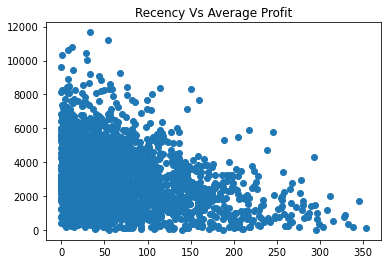

In [66]:
plt.scatter(addr_demo_txns['recency'], addr_demo_txns['monetary_value'])
plt.title('Recency Vs Average Profit')
plt.show()

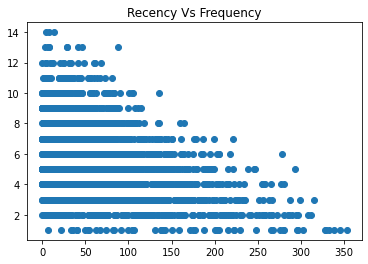

In [67]:
plt.scatter(addr_demo_txns['recency'], addr_demo_txns['frequency'])
plt.title('Recency Vs Frequency')
plt.show()

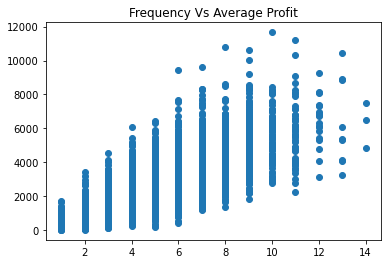

In [68]:
plt.scatter(addr_demo_txns['frequency'], addr_demo_txns['monetary_value'])
plt.title('Frequency Vs Average Profit')
plt.show()

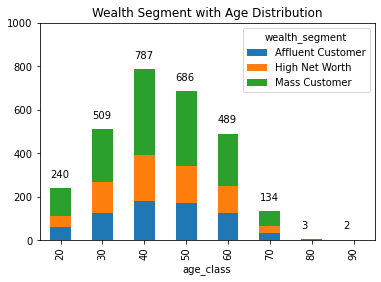

In [72]:
addr_demo_txns.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Wealth Segment with Age Distribution')
plt.show()

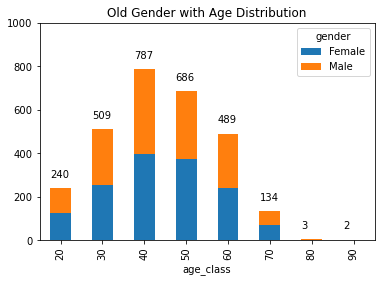

In [73]:
addr_demo_txns.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Gender with Age Distribution')
plt.show()

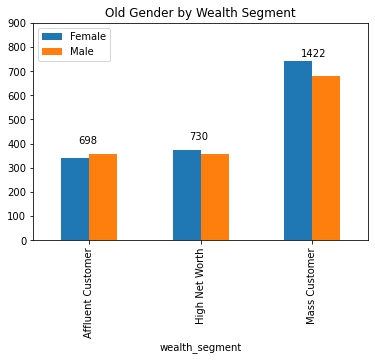

In [75]:
addr_demo_txns.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

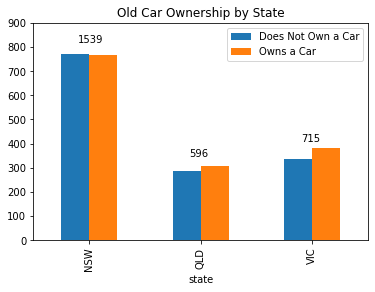

In [76]:
addr_demo_txns.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

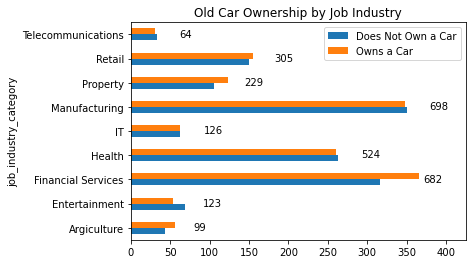

In [77]:
addr_demo_txns.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.title('Old Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

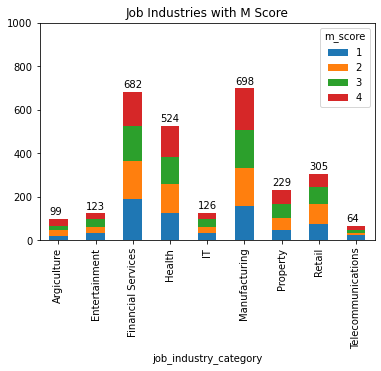

In [78]:
addr_demo_txns.groupby('job_industry_category')['m_score'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('job_industry_category') \
                      .agg({'m_score': lambda x: len(x)})['m_score']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Job Industries with M Score')
plt.show()

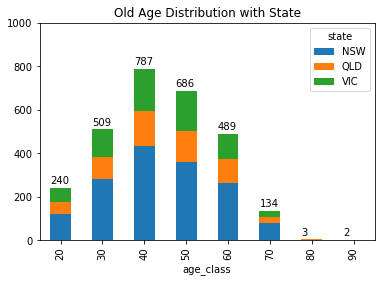

In [79]:
addr_demo_txns.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Age Distribution with State')
plt.show()

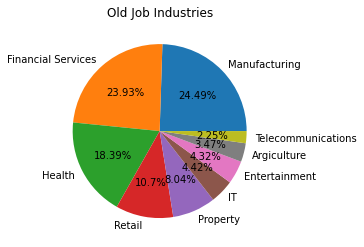

In [82]:
addr_demo_txns.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Old Job Industries')
plt.ylabel('')
plt.show()

<AxesSubplot:xlabel='r_score'>

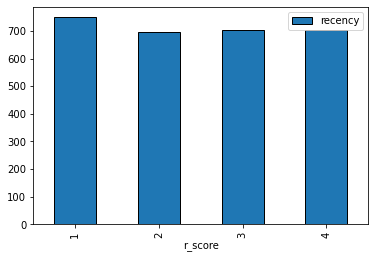

In [44]:
addr_demo_txns.groupby('r_score').agg('recency').count().to_frame().plot(kind= 'bar', edgecolor = 'black')

<AxesSubplot:xlabel='total_score'>

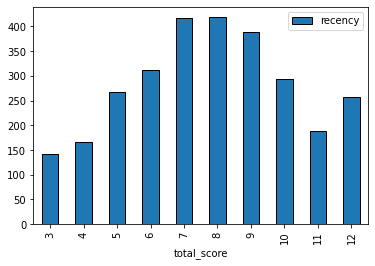

In [45]:
addr_demo_txns.groupby('total_score').agg('recency').count().to_frame().plot(kind = 'bar', edgecolor = 'black')


<AxesSubplot:xlabel='total_score'>

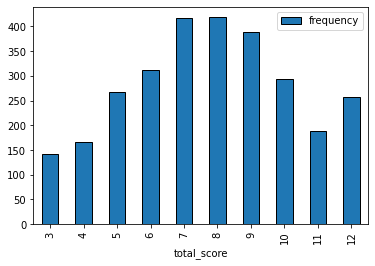

In [46]:
addr_demo_txns.groupby('total_score').agg('frequency').count().to_frame().plot(kind = 'bar', edgecolor= 'black')


<AxesSubplot:xlabel='total_score'>

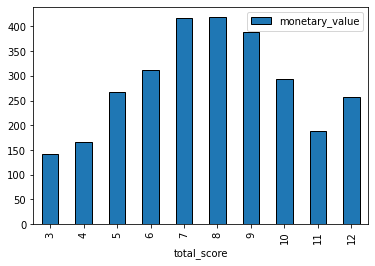

In [47]:
addr_demo_txns.groupby('total_score').agg('monetary_value').count().to_frame().plot(kind = 'bar', edgecolor = 'black')

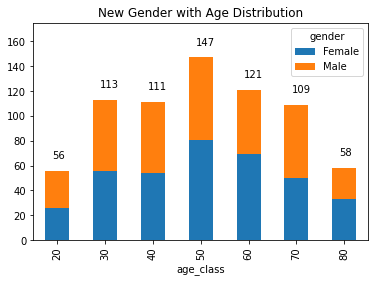

In [96]:
new_cust_list_clean.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 175])
plt.title('New Gender with Age Distribution')
plt.show()

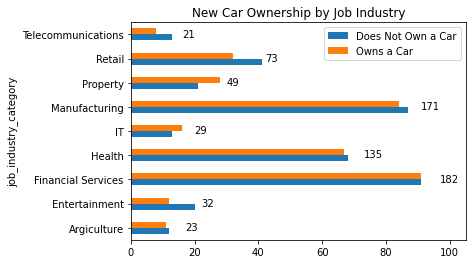

In [97]:
new_cust_list_clean.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 6, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,105])
plt.title('New Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

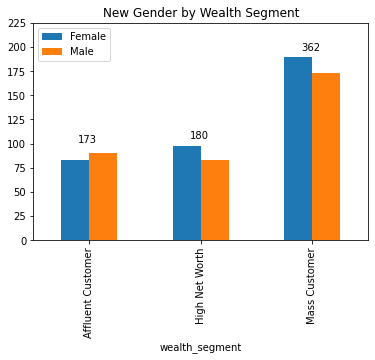

In [98]:
new_cust_list_clean.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 15, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

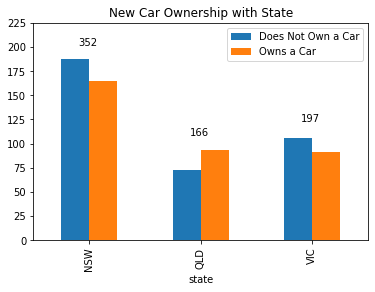

In [99]:
new_cust_list_clean.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Car Ownership with State')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()

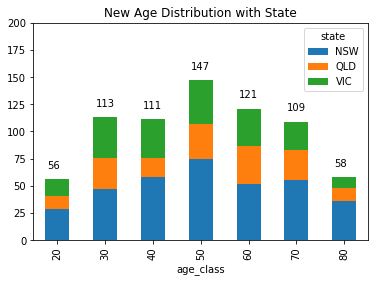

In [100]:
new_cust_list_clean.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .2, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 200])
plt.title('New Age Distribution with State')
plt.show()

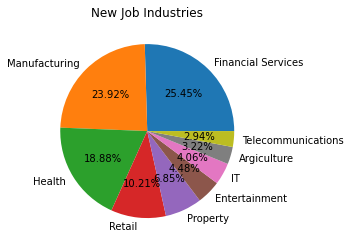

In [101]:
new_cust_list_clean.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('New Job Industries')
plt.ylabel('')
plt.show()

SUBMITTED BY SURMEET MOHANTY